In [2]:
from environment import Environment
from sklearn.datasets import load_wine, make_classification
import matplotlib.pyplot as plt
from random import random
import numpy as np

In [3]:
# wine_df = load_wine()
# X = wine_df.data
# y = wine_df.target

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_clusters_per_class=2, random_state=42)

env = Environment(X, y)
env.run(50)

100%|██████████| 50/50 [08:48<00:00, 10.56s/it]


{'model': ['RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest',
  'RandomForest'],
 'f1': [np.float64(0.8847783534830167),
  np.float64(0.8949448625940838),
  np.float64(0.8649291090495361),
  np.float64(0.884

In [13]:
min(env.history["accuracy"])

0.16666666666666666

Text(0.5, 1.0, 'metrics along the epochs')

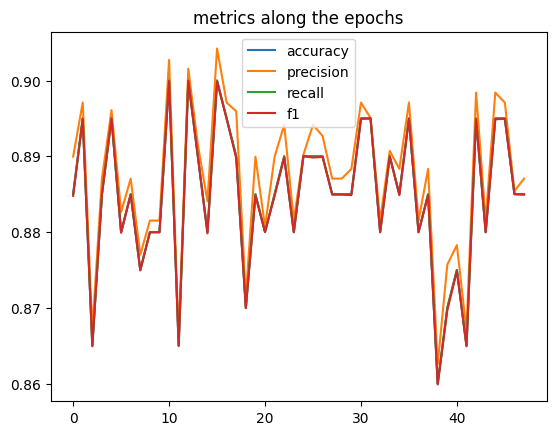

In [4]:
plt.plot(env.history["accuracy"], label="accuracy")
plt.plot(env.history["precision"], label="precision")
plt.plot(env.history["recall"], label="recall")
plt.plot(env.history["f1"], label="f1")
plt.legend()
plt.title("metrics along the epochs")

Text(0.5, 1.0, 'Reviewer feedback along the epochs')

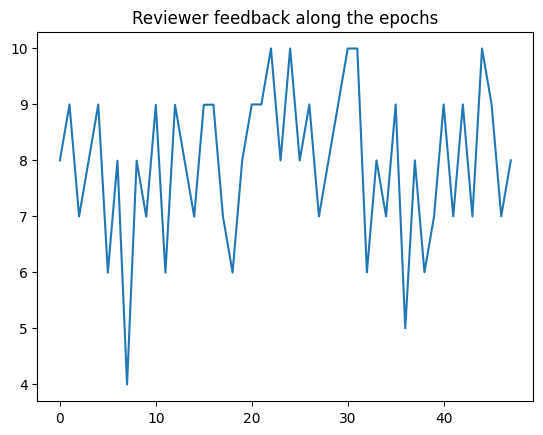

In [5]:
reward = np.array(env.history["reward"])
reward = reward[reward != -1]
plt.plot(reward)
plt.title("Reviewer feedback along the epochs")

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 48.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([-0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15, -0.1 ,
        -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,
         0.4 ,  0.45,  0.5 ]),
 <BarContainer object of 20 artists>)

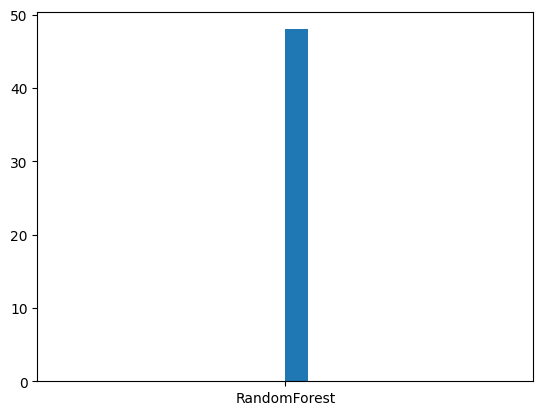

In [6]:
plt.hist(env.history["model"], bins=20)

In [ ]:
from strategy import EpsilonGreedyDecay

strategy = EpsilonGreedyDecay(epsilon_start=1, epsilon_end=0.1, rate=0.99, steps = 1000)

results = [strategy.update_epsilon(i) for i in range(1000)]

In [9]:
print(results[-1])

0.43142275415229636


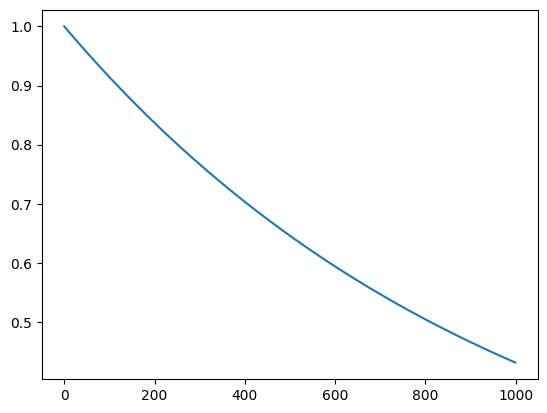

In [10]:
plt.plot(results)